<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import TestImages: testimage
import ImageView: imshow

img = testimage("mandrill")
(xsize, ysize) = size(img)

(512, 512)

In [2]:
function warp(x, y, p)
    xcenter = p[:xcenter]
    ycenter = p[:ycenter]
    distance = sqrt((xcenter-x)^2 + (ycenter-y)^2)
    mod_ = 0.25*sin(p[:distance_coef]*(distance/(p[:time]+p[:shift]+0.1)))+0.75
    g(xcenter, x) = xcenter + (x - xcenter)*mod_
    xnew = g(xcenter, x)
    ynew = g(ycenter, y)
    xnew, ynew
end

warp (generic function with 1 method)

In [3]:
function apply_warp(warp, im, p)
    (xsize, ysize) = size(im)
    p[:xsize] = xsize
    p[:ysize] = ysize
    function linear_interpolation(x_y)
        # a rough draft, this can be improved; works on im
        x = x_y[1]
        y = x_y[2]
        dx=mod(x,1)
        dy=mod(y,1)
        x_left = floor(Int,x)
        y_left = floor(Int,y)
        x_right = min(x_left + 1, xsize)
        y_right = min(y_left + 1, ysize)
        im[x_left,y_left]*(1-dx)*(1-dy) + im[x_left,y_right]*(1-dx)*dy + im[x_right,y_left]*dx*(1-dy) + im[x_right, y_right]*dx*dy
    end
    [linear_interpolation(warp(x,y,p)) for x in 1:xsize, y in 1:ysize]
end

apply_warp (generic function with 1 method)

In [4]:
params = Dict(:distance_coef=>0.8, :xcenter=>61, :ycenter=>176)
params[:time] = 2
params[:shift] = params[:time]/(1+0.01*params[:time])
params

Dict{Symbol, Real} with 5 entries:
  :shift         => 1.96078
  :distance_coef => 0.8
  :xcenter       => 61
  :ycenter       => 176
  :time          => 2

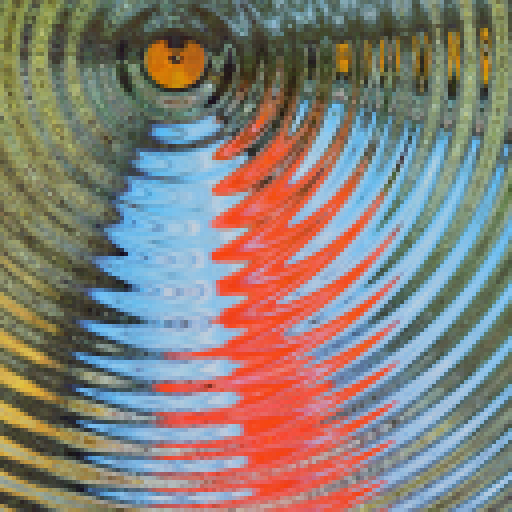

┌ Warning: Output swatches are reduced due to the large size (512×512).
│ Load the ImageShow package for large images.
└ @ Colors C:\Users\cab\.julia\packages\Colors\mIuXl\src\display.jl:159


In [5]:
apply_warp(warp, img, params)

In [6]:
imgs = [apply_warp(warp, img, params) for params[:time] in 0:1/3:9
                   for params[:shift] in [params[:time]/(1+0.01*params[:time])]]

28-element Vector{Matrix{ColorTypes.RGB{Float64}}}:
 [RGB{Float64}(0.49859386360466645,0.5778039293777757,0.3304450602399077) RGB{Float64}(0.3586740575981785,0.3894960400374662,0.19114773035089774) … RGB{Float64}(0.4875113387029997,0.5103352283852869,0.3308759197005883) RGB{Float64}(0.4517496900519055,0.5434105608541194,0.518913549283816); RGB{Float64}(0.44267504840702704,0.4141293025697545,0.25247287123693835) RGB{Float64}(0.5876465818605789,0.6842258932580272,0.43521668590778995) … RGB{Float64}(0.4719608366968127,0.5031415604085948,0.4387348107345303) RGB{Float64}(0.4053074670390709,0.3972523830602807,0.24321320463495016); … ; RGB{Float64}(0.3950596154678328,0.385154136170812,0.2675246021931103) RGB{Float64}(0.4841542556144955,0.5655578630755732,0.5619487054293977) … RGB{Float64}(0.3899518017717757,0.40683037612218453,0.3710741085612446) RGB{Float64}(0.5317299692380124,0.6086223623249737,0.47228933238855514); RGB{Float64}(0.6434544636552054,0.5181165993077598,0.2774998808552138) RGB{

In [7]:
zsize = length(imgs)

28

In [8]:
using FileIO

full_imgs = []
for i in 1:zsize
    push!(full_imgs, imgs[i])
end
for i in reverse(2:(zsize-1))
    push!(full_imgs, imgs[i])
end

save("exersize2.gif", cat(full_imgs..., dims=3), fps=30)

LoadError: ArgumentError: Package FileIO not found in current path.
- Run `import Pkg; Pkg.add("FileIO")` to install the FileIO package.

In [9]:
imgs_long = [apply_warp(warp, img, params) for params[:time] in 0:0.1:9
                   for params[:shift] in [params[:time]/(1+0.01*params[:time])]]

91-element Vector{Matrix{ColorTypes.RGB{Float64}}}:
 [RGB{Float64}(0.49859386360466645,0.5778039293777757,0.3304450602399077) RGB{Float64}(0.3586740575981785,0.3894960400374662,0.19114773035089774) … RGB{Float64}(0.4875113387029997,0.5103352283852869,0.3308759197005883) RGB{Float64}(0.4517496900519055,0.5434105608541194,0.518913549283816); RGB{Float64}(0.44267504840702704,0.4141293025697545,0.25247287123693835) RGB{Float64}(0.5876465818605789,0.6842258932580272,0.43521668590778995) … RGB{Float64}(0.4719608366968127,0.5031415604085948,0.4387348107345303) RGB{Float64}(0.4053074670390709,0.3972523830602807,0.24321320463495016); … ; RGB{Float64}(0.3950596154678328,0.385154136170812,0.2675246021931103) RGB{Float64}(0.4841542556144955,0.5655578630755732,0.5619487054293977) … RGB{Float64}(0.3899518017717757,0.40683037612218453,0.3710741085612446) RGB{Float64}(0.5317299692380124,0.6086223623249737,0.47228933238855514); RGB{Float64}(0.6434544636552054,0.5181165993077598,0.2774998808552138) RGB{

In [10]:
zsize = length(imgs_long)

91

In [11]:
full_imgs_long = []
for i in 1:zsize
    push!(full_imgs_long, imgs_long[i])
end
for i in reverse(2:(zsize-1))
    push!(full_imgs_long, imgs_long[i])
end

save("exersize2_long.gif", cat(full_imgs_long..., dims=3), fps=30)

LoadError: UndefVarError: `save` not defined

In [12]:
imgs_init = [apply_warp(warp, img, params) for params[:time] in 0:0.02:3
                   for params[:shift] in [params[:time]/(1+0.01*params[:time])]]

151-element Vector{Matrix{ColorTypes.RGB{Float64}}}:
 [RGB{Float64}(0.49859386360466645,0.5778039293777757,0.3304450602399077) RGB{Float64}(0.3586740575981785,0.3894960400374662,0.19114773035089774) … RGB{Float64}(0.4875113387029997,0.5103352283852869,0.3308759197005883) RGB{Float64}(0.4517496900519055,0.5434105608541194,0.518913549283816); RGB{Float64}(0.44267504840702704,0.4141293025697545,0.25247287123693835) RGB{Float64}(0.5876465818605789,0.6842258932580272,0.43521668590778995) … RGB{Float64}(0.4719608366968127,0.5031415604085948,0.4387348107345303) RGB{Float64}(0.4053074670390709,0.3972523830602807,0.24321320463495016); … ; RGB{Float64}(0.3950596154678328,0.385154136170812,0.2675246021931103) RGB{Float64}(0.4841542556144955,0.5655578630755732,0.5619487054293977) … RGB{Float64}(0.3899518017717757,0.40683037612218453,0.3710741085612446) RGB{Float64}(0.5317299692380124,0.6086223623249737,0.47228933238855514); RGB{Float64}(0.6434544636552054,0.5181165993077598,0.2774998808552138) RGB

In [13]:
zsize = length(imgs_init)

151

In [14]:
full_imgs_init = []
for i in 1:zsize
    push!(full_imgs_init, imgs_init[i])
end
for i in reverse(2:(zsize-1))
    push!(full_imgs_init, imgs_init[i])
end

save("exersize2_init.gif", cat(full_imgs_init..., dims=3), fps=30)

LoadError: UndefVarError: `save` not defined